In [1]:
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pheno_file = ('/Users/clarasun/Brainhack/bh_participants.tsv') 
# indicate where the dataset is downloaded

pheno = pandas.read_csv(pheno_file,sep='\t')

pheno.head()

,participant_id,age_ses-T1,age_ses-T2,sex,handedness,ADHD_diagnosis,ADHD_medication,SLD_datetime,SLI_datetime,SSD_datetime,SSI_datetime,VLD_datetime,VLI_datetime,VSD_datetime,VSI_datetime,race,ethnicity
0,sub-01,10.77,NaN,1,2.0,1,Metadate daily,1810-04-13 15:29:55,1810-04-13 15:23:35,1810-04-13 15:18:15,1810-04-13 15:08:51,NaN,NaN,NaN,NaN,3.0,2.0
1,sub-02,11.90,NaN,1,2.0,1,Concerta on school days,1810-01-22 10:00:51,1810-01-22 09:55:29,NaN,1810-01-22 10:09:20,1810-01-22 09:49:58,1810-01-22 09:44:33,NaN,1810-01-22 09:38:57,5.0,1.0
2,sub-03,11.19,13.59,1,2.0,0,NaN,1810-06-24 11:30:13,1810-06-24 11:24:53,1810-06-24 11:19:32,1810-06-24 11:35:30,1810-11-18 10:25:53,1810-11-18 10:06:42,1810-11-18 10:20:21,1810-11-18 10:15:01,5.0,2.0
3,sub-04,9.22,11.54,1,2.0,1,Vvyanse once,1810-04-24 14:54:29,1810-04-24 15:06:54,1810-04-24 15:13:18,1810-04-24 15:00:59,1810-07-17 15:27:47,1810-07-17 15:16:30,1810-07-17 15:10:38,1810-07-17 15:22:33,6.0,2.0
4,sub-05,8.59,NaN,1,2.0,1,"focalin - 20 mg, Monday - Friday",NaN,NaN,NaN,NaN,1810-12-19 12:45:49,1811-02-21 09:20:20,NaN,NaN,3.0,2.0


In [3]:
# what are our different variables?
pheno.columns # find out the variables 

Index(['participant_id', 'age_ses-T1', 'age_ses-T2', 'sex', 'handedness',
       'ADHD_diagnosis', 'ADHD_medication', 'SLD_datetime', 'SLI_datetime',
       'SSD_datetime', 'SSI_datetime', 'VLD_datetime', 'VLI_datetime',
       'VSD_datetime', 'VSI_datetime', 'race', 'ethnicity'],
      dtype='object')

### UNIVARIATE VISUALIZATION ###

In [4]:
print(pheno['age_ses-T1'].describe()) 

count    79.000000
mean     10.391646
std       0.958312
min       8.590000
25%       9.580000
50%      10.510000
75%      11.195000
max      11.960000
Name: age_ses-T1, dtype: float64


In [5]:
# simple histogram with seaborn
# recall we imported seaborn package as sns
sns.distplot(pheno['Age'], # error because there is no variable "Age"
             color='black',
             rug=True
            )

KeyError: 'Age'

/Users/clarasun/miniconda3/lib/python3.10/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/clarasun/miniconda3/lib/python3.10/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='age_ses-T1', ylabel='Density'>

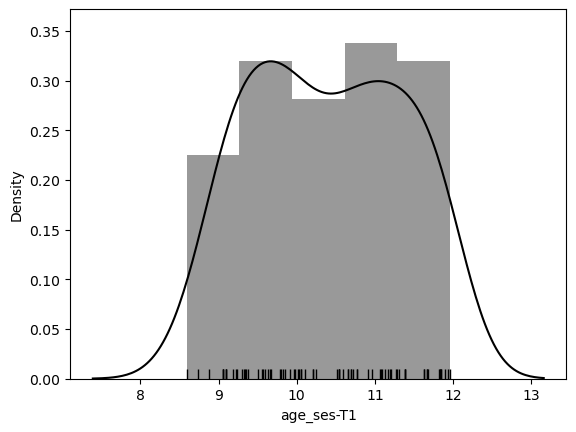

In [6]:
# simple histogram with seaborn
# recall we imported seaborn package as sns
sns.distplot(pheno['age_ses-T1'], # error because there is no variable "Age"
             color='black',
             rug=True
            )

/Users/clarasun/miniconda3/lib/python3.10/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/clarasun/miniconda3/lib/python3.10/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='age_ses-T1'>

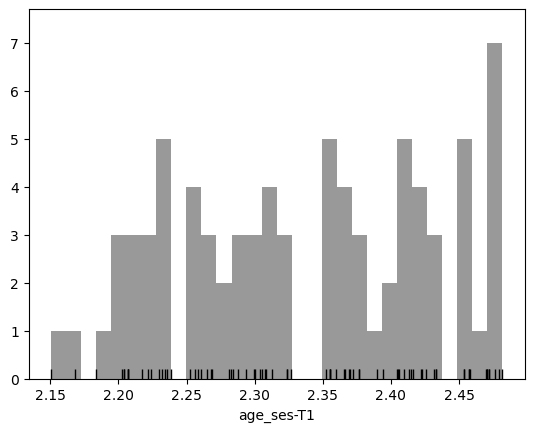

In [7]:
import numpy as np
# apply log normalization 
log_age = np.log(pheno['age_ses-T1'])
sns.distplot(log_age,
            bins=30,          
            color='black',    
            kde=False,         
            rug=True,          
            )

In [8]:
pheno['AgeGroup'].value_counts() # results in error because there is no variable "AgeGroup"

KeyError: 'AgeGroup'

In [9]:
pheno['race'].value_counts()

5.0    51
3.0    18
6.0     7
7.0     1
2.0     1
Name: race, dtype: int64

/Users/clarasun/miniconda3/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='ADHD_diagnosis', ylabel='count'>

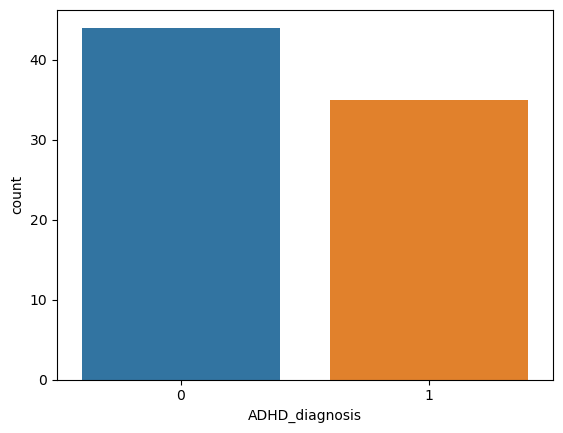

In [10]:
# Countplot of ADHD diagnoses

sns.countplot(pheno['ADHD_diagnosis'])
# bar graph comparing the number of children with and without ADHD
# 1 = no ADHD (n=44)
# 0 = ADHD diagnosed (n=35)

In [11]:
pheno['ADHD_diagnosis'].value_counts()

0    44
1    35
Name: ADHD_diagnosis, dtype: int64